In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans,whiten
import pandas as pd
import sys
sys.path.insert(1,'/cndd/hop006/Github/RewardReversalPorject/cluster')
import cluster_func as cf

In [2]:
def get_centroid(k,low=0.5,high=4.5,plot=False):
    out=np.random.uniform(low,high,k*2)
    out=out.reshape(k,2)
    if plot:
        plt.scatter(out[:,0],out[:,1]) 
    return out
def Gcloud(centroids,plot=True):
    out=[]
    for i in centroids:
        mean=i
        cov=np.random.uniform(0.05,0.25) # variance is drawn here
        N=np.random.randint(25,35) # sample size is drawn here
        print('variance:'+str(cov)+' N:'+str(N))
        cov=np.array([[cov,0],[0,cov]])
        x,y=np.random.multivariate_normal(mean,cov,N).T
        out.append([x,y])
        if plot:
            plt.plot(x,y,'x')
            plt.xlim(left=0,right=7)
            plt.ylim(bottom=0,top=7)
    return np.array(out)

variance:0.10293343488989817 N:28
variance:0.0810150999913629 N:26
variance:0.2034907107833031 N:25
variance:0.105317223354311 N:25
variance:0.06960637598187731 N:26


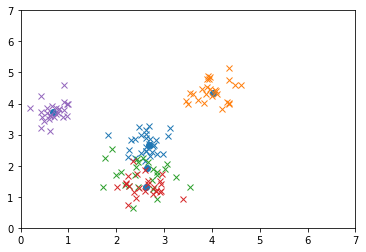

In [3]:
centroids=get_centroid(5,plot=True)
out=Gcloud(centroids)

In [4]:
outx=np.array(out[0][0])
outy=np.array(out[0][1])
for i in range(1,5):
    outx = np.concatenate((outx,out[i][0]),axis=0)
    outy = np.concatenate((outy,out[i][1]),axis=0)
obs=np.array([outx,outy]);

In [9]:
km_list,ssd_list,silhouette_list,ch_list,label_list,k_list = cf.kmeans(obs.T,6)

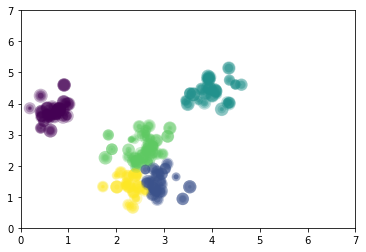

In [29]:
#plot
df = pd.DataFrame(obs.T)
df['label'] = label_list[-1]
fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green','tab:black','tab:red']:
    n = 750
    x = df[0]
    y = df[1]
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=df['label'], s=scale, label=color,
               alpha=0.3, edgecolors='none')
    plt.xlim(left=0,right=7)
    plt.ylim(bottom=0,top=7)

# BIC

# AIC

# MML